이번에는 머신러닝의 비지도 학습(Unsupervised Learning) 중 가장 직관적이고 널리 사용되는 'K-Means 군집화(K-Means Clustering)'를 다룬다.

이 시간의 핵심은 "정답(Label)이 없는 상태에서, 데이터들이 가진 유사성만으로 의미 있는 그룹을 만들어내는 원리"를 이해하는 것이다. 헬스케어 분야에서 환자 세분화(Segmentation)나 알려지지 않은 질병의 패턴을 발견하는 데 필수적인 기술이다.

---

# 📘 [3차] 2.1. K-Means 군집화: 정답 없는 데이터의 그룹 짓기

## 1. 지도 학습의 한계와 비지도 학습의 필요성

### 1) 정답지가 없는 시험 문제
1일차와 2일차에 우리는 '지도 학습(Supervised Learning)'을 배웠다. 회귀든 분류든, 모델에게는 항상 "문제($x$)와 정답($y$)"이 함께 주어졌다.
*   "이 환자의 폐 사진($x$)은 암($y$)이다."
*   "이 사람의 키와 몸무게($x$)일 때 혈압은 120($y$)이다."

하지만 현실 세계, 특히 의료 현장의 데이터는 친절하게 정답이 붙어있지 않은 경우가 훨씬 많다.
새로운 바이러스가 유행한다고 가정해 보자. 병원에는 수천 명의 환자가 몰려든다. 의사들은 아직 이 병의 정체를 모른다. 누가 중증인지, 누가 경증인지, 어떤 유형의 환자가 위험한지 '라벨(Label)'이 전혀 없는 상태다. 그저 환자들의 증상 데이터(체온, 기침 빈도, 산소 포화도 등)만 덩그러니 쌓여 있을 뿐이다.

이때 우리는 AI에게 "암인지 맞춰봐"라고 명령할 수 없다. 배운 적이 없기 때문이다. 대신 이렇게 명령해야 한다.
> "우리는 정답을 모른다. 하지만 이 환자들끼리 서로 얼마나 비슷한지 분석해서, 비슷한 사람들끼리 몇 개의 그룹으로 묶어줘."

이것이 바로 비지도 학습(Unsupervised Learning)이며, 그중 가장 대표적인 기술이 데이터를 끼리끼리 묶는 '군집화(Clustering)'이다.

### 2) 군집화(Clustering) vs 분류(Classification)
초심자가 가장 많이 헷갈리는 것이 군집화와 분류의 차이이다.
*   분류 (지도 학습): 이미 '개'와 '고양이'라는 정답 반이 정해져 있다. 새로운 사진이 오면 "너는 개 반으로 가", "너는 고양이 반으로 가"라고 배정하는 것이다. (반 배정)
*   군집화 (비지도 학습): 반이 없다. 운동장에 학생 100명이 섞여 있다. 선생님이 "비슷한 애들끼리 모여봐"라고 한다. 안경 쓴 애들끼리 모이고, 운동복 입은 애들끼리 모인다. 나중에 보니 '공부 그룹', '운동 그룹'이 되었다. (동아리 만들기)

---

## 2. K-Means 알고리즘: 땅따먹기와 선거 유세

K-Means는 데이터를 $K$개의 그룹(Cluster)으로 묶는 알고리즘이다. 여기서 $K$는 '몇 개의 그룹으로 나눌지' 사람이 정해주는 숫자이고, Means는 각 그룹의 '중심(평균, Centroid)'을 의미한다.

이 알고리즘이 작동하는 방식은 마치 '깃발 꽂기 땅따먹기' 혹은 '선거 유세'와 놀랍도록 비슷하다. 그 과정을 단계별로 상세히 뜯어보자.

### 1단계: 깃발 꽂기 (초기화, Initialization)
데이터들이 2차원 평면(운동장)에 흩뿌려져 있다. 우리는 이들을 3개($K=3$)의 그룹으로 나누고 싶다.
컴퓨터는 아무런 정보가 없으므로, 일단 운동장 아무 데나 무작위로 깃발(중심점, Centroid) 3개를 꽂는다. 이 깃발들이 각 그룹의 '임시 대표'가 된다.

### 2단계: 줄 서기 (할당, Assignment)
이제 모든 데이터 포인트(환자)들은 선택을 해야 한다.
*   환자 A: "나는 빨간 깃발까지 거리가 10m, 파란 깃발까지 50m네. 빨간 깃발이 더 가까우니까 빨간 팀 할래."
*   환자 B: "나는 파란 깃발이 제일 가까워. 파란 팀 할래."

모든 데이터가 자신과 가장 가까운 깃발을 찾아가서 그 팀에 소속된다. 이렇게 하면 운동장은 3개의 구역으로 임시 분할된다.

### 3단계: 깃발 이동 (업데이트, Update)
팀이 꾸려졌다. 그런데 처음에 깃발을 아무 데나 꽂았기 때문에, 깃발의 위치가 그 팀의 한가운데가 아닐 확률이 높다. 팀원들이 불만을 가진다. "우리 대표인데 왜 저기 구석에 가 있습니까?"
그래서 깃발을 뽑아서, 현재 그 팀에 속한 모든 팀원들의 '정중앙(평균 위치)'으로 이동시킨다. 이제 깃발은 그 그룹을 더 잘 대표하는 위치에 서게 된다.

### 4단계: 반복 (Iteration) - 대혼돈의 시작
깃발이 이동했다! 그러면 상황이 바뀐다.
*   환자 C: "아까는 빨간 깃발이 더 가까웠는데, 깃발들이 움직이고 나니까 이제는 노란 깃발이 더 가깝네? 나 팀 옮길래!"

깃발의 위치가 바뀌었으므로, 데이터들은 다시 한번 거리를 재고 가장 가까운 깃발을 다시 선택한다(2단계 반복). 팀원 구성이 바뀌었으므로, 깃발은 다시 한번 새로운 팀원들의 정중앙으로 이동한다(3단계 반복).

### 5단계: 수렴 (Convergence) - 평화의 도래
이 과정을 계속 반복한다. 깃발은 점점 데이터가 밀집한 곳의 중심으로 찾아 들어간다.
어느 순간이 되면, 깃발을 아무리 중앙으로 옮겨도 팀원 구성이 바뀌지 않는 상태가 온다. 깃발이 '진정한 중심'에 박힌 것이다. 이때 알고리즘은 종료되고, 군집화가 완성된다.

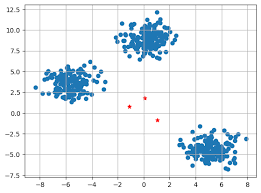
---

## 3. 거리(Distance)는 곧 유사성(Similarity)이다

K-Means 알고리즘의 핵심은 "가깝다"는 것을 어떻게 정의하느냐에 있다. 머신러닝에서 거리는 곧 '유사성'을 의미한다.

### 1) 유클리드 거리 (Euclidean Distance)
우리가 중고등학교 때 배운 점과 점 사이의 직선거리를 말한다. 피타고라스의 정리를 생각하면 된다.
$$ \text{거리} = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2} $$

### 2) 헬스케어 데이터에서의 거리
좌표 평면 위의 점이 아니라, 환자의 데이터라고 생각해보자.
*   환자 A: (BMI 22, 혈당 90)
*   환자 B: (BMI 23, 혈당 95)
*   환자 C: (BMI 35, 혈당 200)

수학적으로 거리를 계산해보면 A와 B 사이의 거리는 매우 가깝고(숫자 차이가 작음), C는 아주 멀리 떨어져 있다.
*   거리가 가깝다: 임상적 특징이 비슷하다. (A와 B는 건강한 그룹)
*   거리가 멀다: 임상적 특징이 다르다. (C는 고위험군)

K-Means는 이 '거리' 하나만 가지고, 우리가 알려주지 않아도 A와 B를 같은 그룹으로, C를 다른 그룹으로 묶어낸다. 즉, "비슷한 증상을 가진 환자군"을 자동으로 발굴해내는 것이다.

---

## 4. K-Means의 난제와 해결 전략

아주 훌륭한 알고리즘이지만, K-Means를 쓸 때는 분석가가 꼭 해결해야 할 숙제가 있다.

### 1) K를 몇 개로 할 것인가? (결정 장애)
지도 학습은 정답이 있었다. (암/정상 $\rightarrow$ 2개). 하지만 비지도 학습은 정답이 없다.
이 환자들을 3개 그룹(상/중/하)으로 나누는 게 좋을까? 아니면 5개 세부 그룹으로 나누는 게 좋을까? 정답은 없다. 하지만 힌트는 얻을 수 있다.

*   관성(Inertia): 각 그룹의 중심점과 그 그룹 팀원들 사이의 거리의 합이다. 즉, "팀원들이 얼마나 똘똘 뭉쳐있는가"를 나타낸다. (작을수록 좋다.)
*   엘보우 기법 (Elbow Method):
    *   $K$를 1개부터 10개까지 늘려가며 관성을 계산해 본다.
    *   그룹을 많이 만들수록 똘똘 뭉치니까 관성은 줄어든다.
    *   하지만 어느 순간부터는 그룹을 더 늘려봤자 관성이 별로 줄어들지 않는 시점이 온다. 그래프가 팔꿈치처럼 꺾이는 이 지점이 바로 '가성비가 가장 좋은 최적의 K'이다.

### 2) 전처리의 중요성 (스케일링 필수)
K-Means는 오직 '거리'만 본다고 했다. 여기서 1일차에 배운 스케일링의 중요성이 다시 등장한다.
*   변수 1: 나이 (0 ~ 100)
*   변수 2: 백혈구 수치 (4,000 ~ 10,000)

스케일링 없이 거리를 재면, 백혈구 수치의 차이(수천 단위)가 나이 차이(수십 단위)를 완전히 압도해버린다. 결과적으로 나이는 무시되고 백혈구 수치만 비슷한 사람들끼리 묶이게 된다.
따라서 K-Means를 돌리기 전에는 반드시 표준화(StandardScaler)를 통해 모든 변수의 영향력을 공평하게 맞춰줘야 올바른 그룹핑이 된다.

---

## 5. 헬스케어에서의 활용 사례

비지도 학습인 K-Means는 주로 데이터 분석의 초기 단계(탐색)나 전략 수립에 사용된다.

### 1) 환자 위험군 세분화 (Risk Stratification)
만성질환 관리 앱을 만든다고 하자. 모든 환자에게 똑같은 메시지를 보내면 효과가 없다.
환자들의 라이프스타일(운동량, 식습관, 수면시간) 데이터를 넣어 K-Means를 돌린다.
*   그룹 1: 운동은 많이 하지만 술을 자주 마시는 그룹. $\rightarrow$ "절주 가이드" 발송.
*   그룹 2: 운동 부족이고 식습관도 나쁜 고위험 그룹. $\rightarrow$ "병원 방문 알림" 발송.
*   그룹 3: 관리가 잘 되는 모범 그룹. $\rightarrow$ "칭찬 메시지" 발송.
이렇게 맞춤형 관리가 가능해진다.

### 2) 질병 아형(Subtype) 발견
과거에는 '당뇨병'을 하나의 병으로 생각했다. 하지만 유전자 데이터와 임상 데이터를 군집화해보니, 기존에 알던 1형/2형 당뇨 외에도, 인슐린 저항성이 심한 그룹, 신장 합병증 위험이 높은 그룹 등 5가지의 세부 유형이 있다는 사실이 밝혀졌다. 이를 통해 정밀 의료(Precision Medicine)가 가능해진다.

### 3) 이상치 탐지 (Anomaly Detection)
어떤 그룹에도 속하지 못하고 중심점에서 아주 멀리 떨어진 데이터가 있다면?
이것은 매우 특이한 케이스이거나, 기계 오류일 수 있다. K-Means는 정상적인 패턴에서 벗어난 '이상 징후'를 감지하는 데에도 활용될 수 있다.

---

## 6. 요약:

1.  비지도 학습: 정답 없이 데이터의 특징(유사성)만으로 패턴을 찾는 학습 방법이다.
2.  K-Means: 데이터를 K개의 그룹으로 묶는 알고리즘으로, 중심점(Centroid)을 이동시키며 최적의 그룹을 찾아가는 반복(Iteration) 과정을 거친다.
3.  거리 = 유사성: 데이터 공간에서 거리가 가깝다는 것은 임상적 특징이 비슷하다는 뜻이다.
4.  필수 조건: 거리를 기반으로 하기 때문에 데이터 스케일링(표준화)이 반드시 선행되어야 한다.
5.  최적의 K: 엘보우 기법 등을 통해 뭉침 정도(Inertia)가 효율적으로 개선되는 지점을 찾는다.
6.  활용: 환자 세분화, 맞춤형 치료 전략 수립, 새로운 질병 유형 발견 등에 강력한 도구가 된다.

이 개념을 바탕으로, 다음 시간에는 실제로 가상의 환자 데이터를 생성해서 AI가 어떻게 그룹을 나누는지 눈으로 확인해 보겠다.

## 2.2. \[예제 1\] K-Means의 작동 원리 시각화

데이터가 어떻게 그룹핑 되는지 2차원 가상 데이터를 통해 눈으로 확인한다.

상황: 병원 위치를 잡는 것처럼, 흩어진 환자들(점) 사이에
중심점(Centroid)을 배치한다.

``` python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. 가상 데이터 생성 (4개의 그룹이 뚜렷한 형태)
# n_samples=300: 환자 수
# centers=4: 실제 그룹 개수 (모델에게는 안 알려줌)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. K-Means 모델 생성 및 학습
# n_clusters=4: 4개 그룹으로 나눠보라고 명령
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# 3. 결과 확인
y_kmeans = kmeans.predict(X) # 각 점이 몇 번 그룹인지 예측(0,1,2,3)
centers = kmeans.cluster_centers_ # 찾아낸 4개의 중심점 좌표

# 4. 시각화
plt.figure(figsize=(10, 6))
# 데이터 포인트 그리기 (그룹별로 색깔 다르게)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')
# 중심점(Centroid) 그리기
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroids')

plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

# 설명:
# 빨간색 X표시가 K-Means가 찾아낸 각 그룹의 '중심'이다.
# 정답(y_true)을 주지 않았음에도 데이터가 뭉쳐 있는 덩어리를 완벽하게 찾아냈다.
```


> 📖 가이드
>
> K-Means가 어떻게 데이터를 그룹핑하는지 눈으로 직접 확인합니다.
> - 초기화(Initialization): 랜덤하게 깃발(중심점)을 꽂습니다.
> - 할당(Assignment): 각 점들은 가장 가까운 깃발 팀으로 들어갑니다.
> - 이동(Update): 깃발을 팀원들의 정중앙으로 옮깁니다.
> - 반복: 더 이상 깃발이 움직이지 않을 때까지 이 과정을 반복합니다.



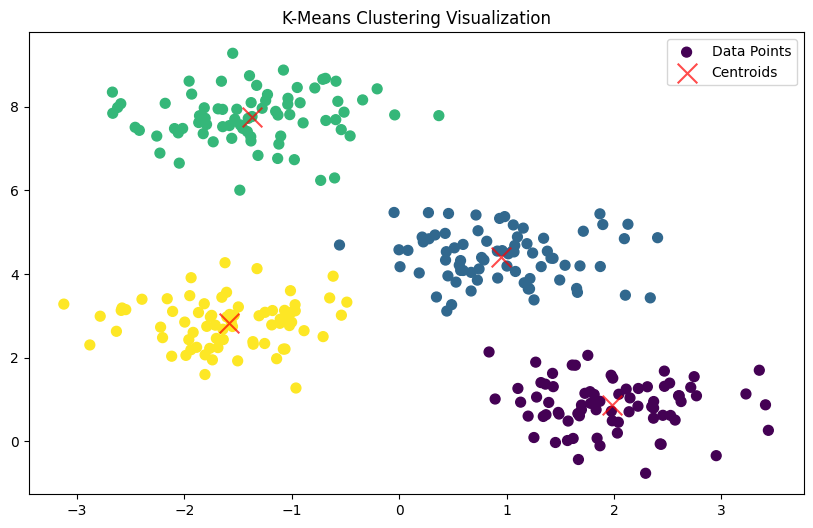

In [7]:
# do write code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

y_kmeans = kmeans.predict(x)
centers = kmeans.cluster_centers_

plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')
#plt.scatter(x[:,0], x[:,1], c=y_true, s=100, cmap='viridis', label='Data Points original')
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=0.7, marker='x', label='Centroids')

plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

## 2.3. \[예제 2\] 최적의 K 찾기: 엘보우 기법 (Elbow Method)

몇 개의 그룹으로 나누는 게 좋을지 모를 때, 수학적으로 힌트를 얻는 방법을
배운다.

상황: 데이터가 몇 덩어리인지 모르는 상황에서 $K$를 1부터 10까지
바꿔가며 실험한다.

``` python
# 1. 관성(Inertia) 계산
# Inertia: 각 데이터와 그 데이터가 속한 중심점 사이의 거리 제곱 합 (작을수록 잘 뭉친 것)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 2. 엘보우 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# 설명:
# K=1에서 K=2, 3, 4로 갈수록 에러(Inertia)가 급격히 줄어든다.
# 하지만 K=4를 지나면 줄어드는 기울기가 완만해진다.
# 팔꿈치처럼 꺾이는 이 지점(K=4)이 '가성비'가 가장 좋은 최적의 클러스터 개수다.
```


> 📖 가이드
>
> "데이터를 몇 개로 나누는 게 가장 좋을까?"에 대한 수학적 힌트를 얻습니다. (Elbow Method)
> - Inertia (관성): 그룹 내의 점들이 얼마나 똘똘 뭉쳐있는지를 나타내는 응집도입니다. (작을수록 좋음)
> - Elbow Point: 그룹 수(K)를 늘릴수록 Inertia는 줄어들지만, 어느 순간 감소세가 둔하집니다. 그 꺾이는 지점(팔꿈치)이 최적의 K입니다.



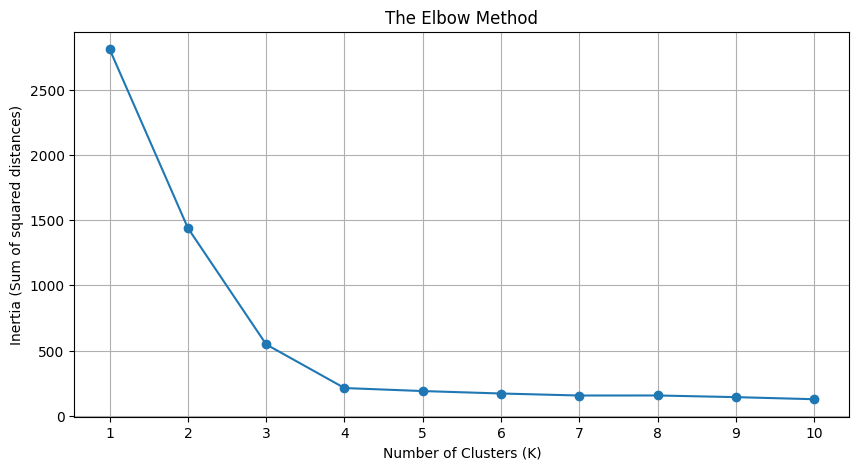

In [8]:
# do write code
inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(k_range, inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## 2.4. \[예제 3\] 헬스케어 사례: 환자 세분화 (Patient Segmentation)

실제와 유사한 환자 데이터를 사용하여 위험군을 분류해본다.

상황: 당뇨병 환자들의 BMI(비만도)와 공복 혈당(Glucose)
정보를 바탕으로 환자군을 나눈다.

``` python
import pandas as pd
import seaborn as sns

# 1. 환자 데이터 생성 (3가지 유형 가정)
# A군: 저체중, 정상혈당
# B군: 비만, 정상혈당 (건강한 비만)
# C군: 비만, 고혈당 (위험군)
np.random.seed(42)
data_A = np.random.normal([18.5, 90], [2, 5], size=(50, 2))
data_B = np.random.normal([30.0, 95], [3, 5], size=(50, 2))
data_C = np.random.normal([32.0, 160], [4, 10], size=(50, 2))

X_patient = np.vstack([data_A, data_B, data_C])
df_patient = pd.DataFrame(X_patient, columns=['BMI', 'Glucose'])

# 2. K-Means 적용 (K=3)
kmeans_p = KMeans(n_clusters=3, random_state=42)
df_patient['Cluster'] = kmeans_p.fit_predict(X_patient)

# 3. 결과 해석 (그룹별 평균 특성 확인)
print("=== 그룹별 평균 특성 ===")
print(df_patient.groupby('Cluster').mean())

# 4. 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_patient, x='BMI', y='Glucose', hue='Cluster', palette='Set1', s=60)
plt.title('Patient Segmentation: BMI vs Glucose')
plt.axhline(126, color='r', linestyle='--', label='Diabetes Threshold') # 당뇨 기준선
plt.legend()
plt.show()

# 설명:
# 의사가 규칙을 정해주지 않았지만, AI는 환자들을 세 그룹으로 나누었다.
# - 한 그룹은 BMI도 높고 혈당도 높은 '고위험 관리 대상'으로 식별된다.
# - 병원은 이 그룹에게 집중적인 의료 서비스를 제공할 수 있다.
```


> 📖 가이드
>
> 정답(Target)이 없는 환자 데이터를 AI에게 던져주고, "알아서 분류해봐"라고 시킵니다. (Patient Segmentation)
> - 데이터: 환자들의 BMI(비만)와 혈당 수치.
> - 결과: AI가 스스로 위험군(비만+고혈당)을 찾아냅니다.
> - 의의: 의사의 개입 없이도 데이터를 기반으로 환자 특성을 파악할 수 있습니다.



=== 그룹별 평균 특성 ===
               BMI     Glucose
Cluster                       
0        29.783529   95.849343
1        32.515787  160.008458
2        18.386698   89.615556


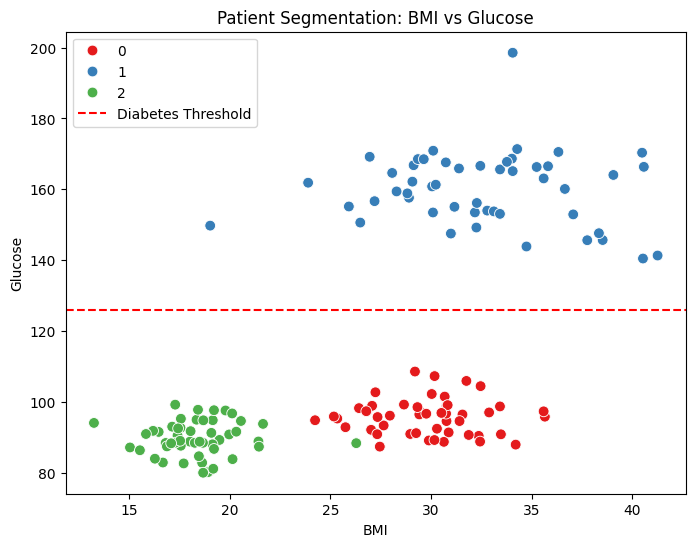

In [9]:
import pandas as pd
import seaborn as sns

np.random.seed(42)
data_A = np.random.normal([18.5, 90], [2,5], size = (50,2))
data_B = np.random.normal([30.0, 95], [3,5], size = (50,2))
data_C = np.random.normal([32.0, 160], [4,10], size=(50,2))

x_patient = np.vstack([data_A, data_B, data_C])
df_patient = pd.DataFrame(x_patient, columns=['BMI', 'Glucose'])

kmeans_p = KMeans(n_clusters=3, random_state=42)
df_patient['Cluster'] = kmeans_p.fit_predict(x_patient)

print("=== 그룹별 평균 특성 ===")
print(df_patient.groupby('Cluster').mean())

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_patient, x='BMI', y='Glucose', hue='Cluster', palette='Set1', s=60)
plt.title('Patient Segmentation: BMI vs Glucose')
plt.axhline(126, color='r', linestyle = '--', label='Diabetes Threshold')
plt.legend()
plt.show()

## 2.5. \[예제 4\] 초기화의 중요성: K-Means++

K-Means는 처음에 깃발을 어디에 꽂느냐(무작위)에 따라 결과가 달라질 수
있다는 단점이 있다. 이를 해결한 `k-means++` 알고리즘의 존재를 안다.

상황: Scikit-learn은 기본적으로 똑똑한 초기화(`init='k-means++'`)를
사용한다. 만약 완전히 랜덤하게(`init='random'`) 하면 어떻게 될까?

``` python
# 1. 나쁜 초기화 (Random Initialization)
# n_init=1: 딱 한 번만 시도해라 (운이 나쁘면 이상한 결과가 나옴)
bad_kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=1)
bad_kmeans.fit(X)
y_bad = bad_kmeans.predict(X)

# 2. 좋은 초기화 (K-Means++, Default)
good_kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
good_kmeans.fit(X)
y_good = good_kmeans.predict(X)

# 3. 비교 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_bad, s=30, cmap='viridis')
plt.title('Bad Initialization (Random)')
plt.scatter(bad_kmeans.cluster_centers_[:, 0], bad_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_good, s=30, cmap='viridis')
plt.title('Good Initialization (K-Means++)')
plt.scatter(good_kmeans.cluster_centers_[:, 0], good_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)

plt.show()

# 설명:
# 'Bad' 그림을 보면, 깃발이 한쪽에 쏠려서 데이터를 억지로 나누는 모습을 볼 수 있다.
# Scikit-learn의 기본값(k-means++)은 깃발들을 최대한 멀리 떨어뜨려 시작하게 함으로써 이런 문제를 방지한다.
```


> 📖 가이드
>
> K-Means의 치명적인 약점인 초기값 문제를 해결합니다.
> - Random Init: 운이 나쁘면 처음 깃발이 한쪽에 쏠려서, 엉뚱한 결과가 나올 수 있습니다.
> - K-Means++: 첫 번째 깃발과 최대한 '멀리 떨어진' 곳에 두 번째 깃발을 꽂는 똑똑한 방식입니다. (Scikit-learn의 기본값)



In [ ]:
# do write code


## 2.6. \[예제 5\] 차원 축소와 군집화의 만남 (PCA + K-Means)

1교시에 배운 PCA로 데이터를 2차원으로 줄인 뒤, 군집화를 수행하여
시각화한다. 고차원 데이터 분석의 정석적인 파이프라인이다.

상황: 유방암 데이터셋(30차원)을 2차원으로 압축하여 군집화하고, 실제
암/정상 레이블과 얼마나 일치하는지 확인한다. (비지도 학습의 성능 검증)

``` python
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드 및 전처리 (스케일링 필수!)
cancer = load_breast_cancer()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

# 2. PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. K-Means 군집화 (K=2, 암 또는 정상)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled) # 군집화는 원본(스케일된) 데이터로 하는 게 보통 더 좋다

# 4. 시각화 (PCA 좌표 위에 K-Means 결과 뿌리기)
plt.figure(figsize=(12, 5))

# K-Means 결과
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.title('K-Means Clustering Result (Unsupervised)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# 실제 정답 (Ground Truth)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap='coolwarm', alpha=0.7)
plt.title('Actual Diagnosis (True Labels)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

# 설명:
# 왼쪽 그림(AI가 스스로 나눈 것)과 오른쪽 그림(실제 정답)이 놀랍도록 비슷하다.
# 정답을 주지 않았는데도, K-Means는 데이터의 패턴만 보고 악성 종양과 양성 종양을 꽤 정확하게 구분해냈다.
# 이것이 비지도 학습의 잠재력이다.
```


> 📖 가이드
>
> 1교시(PCA)와 2교시(K-Means)의 콤비네이션입니다.
> - 단계 1: 30차원 유방암 데이터를 PCA로 2차원으로 축소합니다. (시각화를 위해)
> - 단계 2: 2차원 데이터에 K-Means를 돌려서 2개 그룹(양성/악성 추정)으로 나눕니다.
> - 확인: 정답을 안 알려줬는데도 진짜 암 환자와 정상인을 기가 막히게 구분하는지 확인합니다.



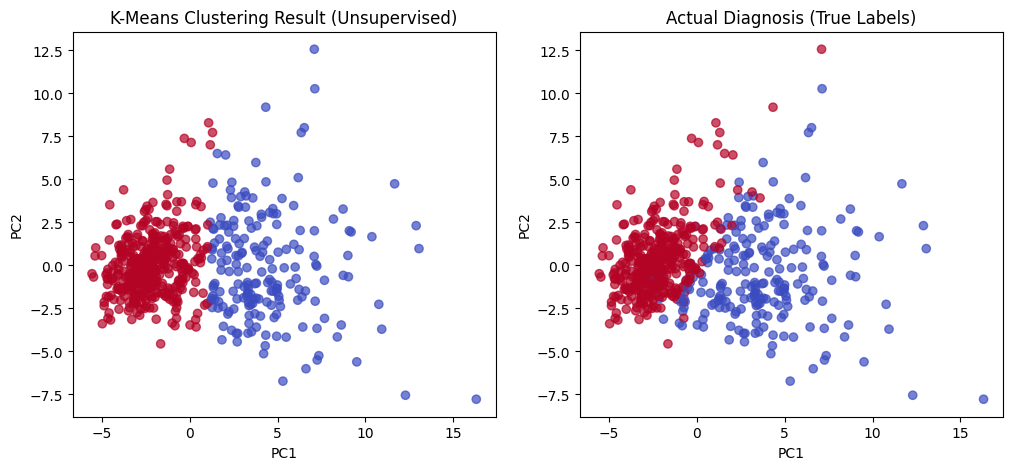

In [10]:
# do write code
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cancer.data)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(x_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='coolwarm', alpha=0.7)
plt.title('K-Means Clustering Result (Unsupervised)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1,2,2)
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer.target, cmap='coolwarm', alpha=0.7)
plt.title('Actual Diagnosis (True Labels)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()